In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam #adaptive learning method algo 

Create 2 classes of points

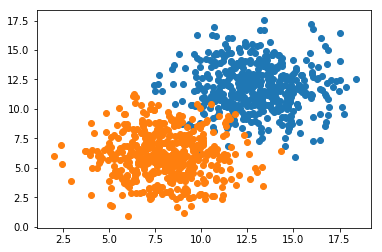

In [7]:
### n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

# training data
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Creating NN and adding layers

Optimization algo
* batch gradient descent : intensive, slow
* stochastic gradient descent 
* adam = adagrad & RMSprop : very efficient

Trade-off : resolution, speed of convergence <= choosing learning rate (auto with ADAM)

Compiling model, specify:
1. optimizer
2. error function
3. metrics => judge performance at every epoch

Training
1. define batch size, trade-off: big=computer can handle, too big=degradation of accuracy
2. define nb of epoch, tradeoff not enough: underfitting, too much=overfitting
3. shuffle data : avoid being stuck at a local minimum

In [14]:
model=Sequential()
model.add(Dense(units=1,input_shape=(2,),activation="sigmoid"))
adam=Adam(lr=0.1)
model.compile(adam,
              loss="binary_crossentropy",
              metrics=["accuracy"])
history=model.fit(x=X,y=y,
          verbose=1,
          batch_size=50,
         epochs=40,
         shuffle="true") # start training

Epoch 1/40
1000/1000 [==============================] - 1s 1ms/step - loss: 0.8184 - acc: 0.5310
Epoch 2/40
1000/1000 [==============================] - 0s 135us/step - loss: 0.5180 - acc: 0.7460
Epoch 3/40
1000/1000 [==============================] - 0s 124us/step - loss: 0.4317 - acc: 0.8530
Epoch 4/40
1000/1000 [==============================] - 0s 108us/step - loss: 0.3675 - acc: 0.8820
Epoch 5/40
1000/1000 [==============================] - 0s 99us/step - loss: 0.3187 - acc: 0.9180
Epoch 6/40
1000/1000 [==============================] - 0s 97us/step - loss: 0.2799 - acc: 0.9380
Epoch 7/40
1000/1000 [==============================] - 0s 96us/step - loss: 0.2491 - acc: 0.9480
Epoch 8/40
1000/1000 [==============================] - 0s 123us/step - loss: 0.2362 - acc: 0.9490
Epoch 9/40
1000/1000 [==============================] - 0s 108us/step - loss: 0.2157 - acc: 0.9580
Epoch 10/40
1000/1000 [==============================] - 0s 108us/step - loss: 0.1943 - acc: 0.9620
Epoch 11/40
10

In [11]:
# comparing with sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
nn=MLPClassifier().fit(X,y);nn.score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.977

In [31]:
et=ExtraTreesClassifier().fit(X,y);et.score(X,y)

/home/valentin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/valentin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


1.0

Text(0, 0.5, 'accuracy')

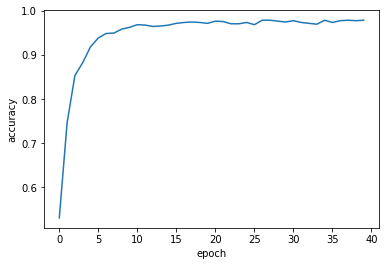

In [17]:
plt.plot(history.history["acc"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

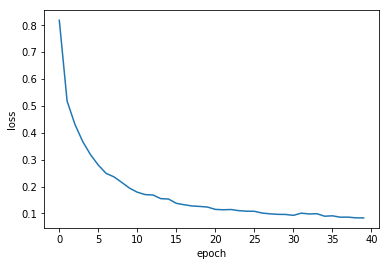

In [18]:
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [27]:
def plot_decision_boundary(X,y,model):
    x_span=np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx,yy=np.meshgrid(x_span,y_span)
    xx_,yy_=xx.ravel(),yy.ravel()
    grid=np.c_[xx_,yy_]
    pred=model.predict(grid)
    z=pred.reshape(xx.shape)
    plt.contourf(xx,yy,z)

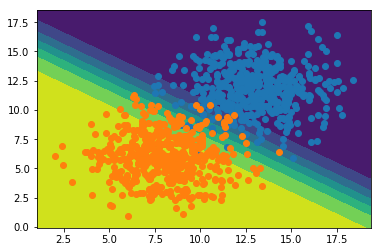

In [29]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

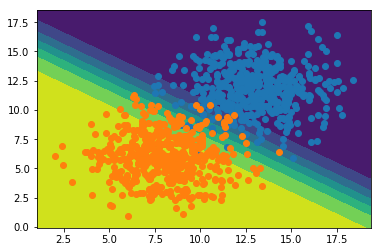

In [32]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

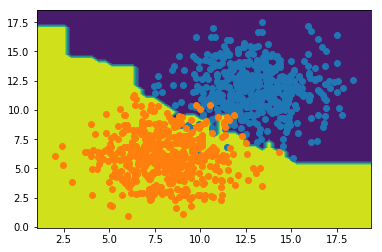

In [33]:
plot_decision_boundary(X,y,et)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])